<a href="https://colab.research.google.com/github/Abhilash-Bee/DeepLearningCertification/blob/main/05_Transfer_Learning_in_TensorFlow_Part_2_Fine_tuning_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 **05. Transfer Learning in TensorFlow Part 2: Fine-tuning Exercises**

1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.
2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?
3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?
4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.


---

---

## **0. Importing Dependencies and getting the helper function**

### Importing important Packages

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

### Download helper function and loading it

In [2]:
!wget https://raw.githubusercontent.com/Abhilash-Bee/DeepLearningCertification/main/extras/helper_function.py

--2024-02-01 18:55:36--  https://raw.githubusercontent.com/Abhilash-Bee/DeepLearningCertification/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7952 (7.8K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   7.77K  --.-KB/s    in 0s      

2024-02-01 18:55:36 (80.1 MB/s) - ‘helper_function.py’ saved [7952/7952]



In [3]:
from helper_function import *

### Getting dataset and extract it.

In [4]:
path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip', extract=True)[:-4]
path

168546183/168546183 [==============================] - 1s 0us/step


'/root/.keras/datasets/10_food_classes_10_percent'

### Walk through the folder path

In [ ]:
walk_through_directory(path)

There are 2 folders and 0 in this '/root/.keras/datasets/10_food_classes_10_percent' directory path.
There are 10 folders and 0 in this '/root/.keras/datasets/10_food_classes_10_percent/test' directory path.
There are 0 folders and 250 in this '/root/.keras/datasets/10_food_classes_10_percent/test/chicken_wings' directory path.
There are 0 folders and 250 in this '/root/.keras/datasets/10_food_classes_10_percent/test/hamburger' directory path.
There are 0 folders and 250 in this '/root/.keras/datasets/10_food_classes_10_percent/test/ramen' directory path.
There are 0 folders and 250 in this '/root/.keras/datasets/10_food_classes_10_percent/test/sushi' directory path.
There are 0 folders and 250 in this '/root/.keras/datasets/10_food_classes_10_percent/test/chicken_curry' directory path.
There are 0 folders and 250 in this '/root/.keras/datasets/10_food_classes_10_percent/test/ice_cream' directory path.
There are 0 folders and 250 in this '/root/.keras/datasets/10_food_classes_10_percen

### Setting the paths of train and test dataset

In [5]:
train_dir = path + '/train/'
test_dir = path + '/test/'

### Data Preprocssing

In [6]:
IMG_SIZE = (224, 224)

train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         image_size=IMG_SIZE,
                                                         label_mode='categorical')

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        image_size=IMG_SIZE,
                                                        label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
len(train_data), len(test_data)

(24, 79)

In [8]:
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### Plot random images from the dataset

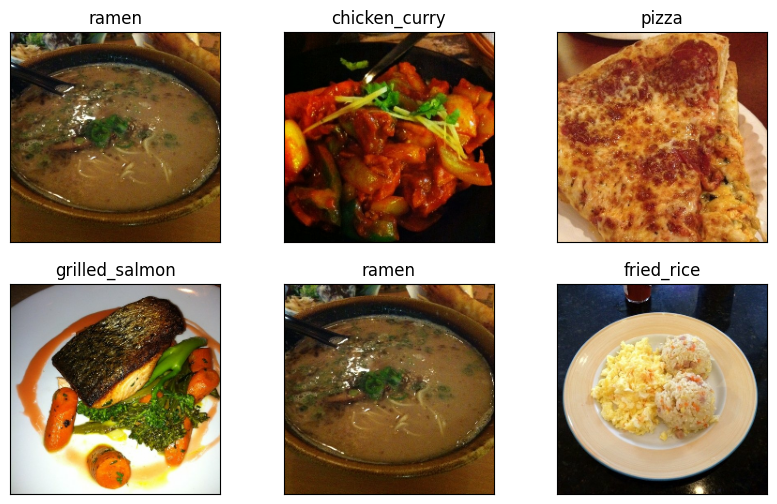

In [ ]:
plot_images(list(train_data.as_numpy_iterator()), class_names)

---

---

## **1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.**

### Creating Base Model

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False,
                                                            input_shape=IMG_SHAPE)

base_model.trainable = False

### Creating the model

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE, name='Input_layer')

# x = data_rescaling(inputs)

x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name='Output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


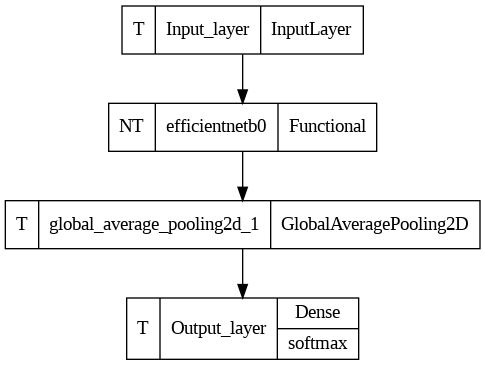

In [ ]:
tf.keras.utils.plot_model(model_0, show_layer_activations=True, show_trainable=True)

In [ ]:
len(model_0.trainable_variables)

2

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

### Compiling the model

In [ ]:
model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

### Fit the model

In [ ]:
history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data),
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='10_epoch_10_per_data'),
                                   tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                              experiment_name='10_epoch_10_per_data')])

Saving the tensorboard callbacks in Tensorboard/10_epoch_10_per_data/20240201-180620
Path of the checkpoint: ModelCheckpoint/10_epoch_10_per_data/20240201-180620
Epoch 1/10
23/24 [===========================>..] - ETA: 0s - loss: 1.8844 - accuracy: 0.4443
Epoch 1: saving model to ModelCheckpoint/10_epoch_10_per_data/20240201-180620
24/24 [==============================] - 13s 261ms/step - loss: 1.8716 - accuracy: 0.4520 - val_loss: 1.2736 - val_accuracy: 0.7500
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.0770 - accuracy: 0.7853
Epoch 2: saving model to ModelCheckpoint/10_epoch_10_per_data/20240201-180620
24/24 [==============================] - 5s 188ms/step - loss: 1.0720 - accuracy: 0.7867 - val_loss: 0.8545 - val_accuracy: 0.8094
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7690 - accuracy: 0.8315
Epoch 3: saving model to ModelCheckpoint/10_epoch_10_per_data/20240201-180620
24/24 [==============================] - 4s 158ms/step - lo

In [ ]:
modelcheckpoint_path = 'ModelCheckpoint/10_epoch_10_per_data/20240201-180620'

### Evaluate the model

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.4451 - accuracy: 0.8764


[0.44512349367141724, 0.8763999938964844]

### Plot loss and accuracy curve

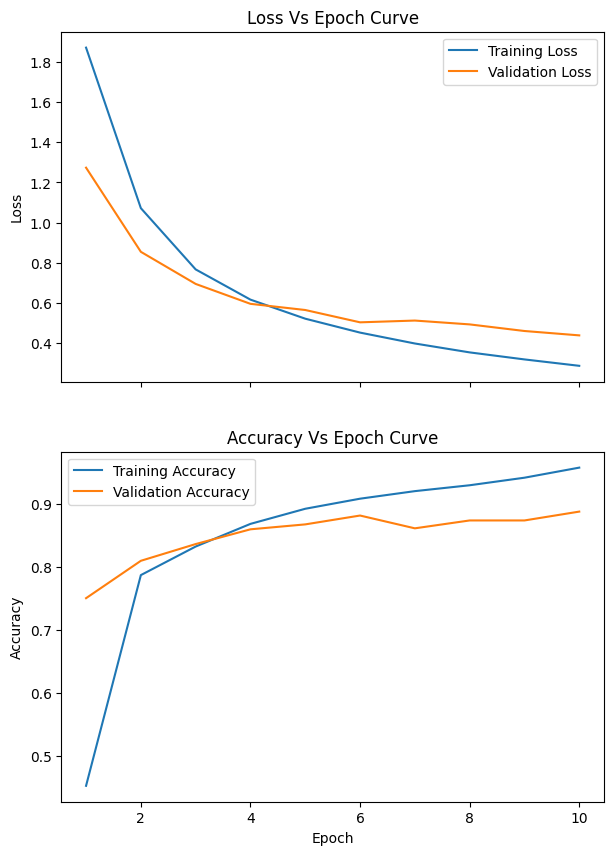

In [ ]:
plot_loss_accuracy_curve(history_0)

---

---

## **2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?**

### Change the base model layers trainable to `True`

In [ ]:
base_model.trainable = True

### Change all base_model all layers trainable to False except last 20 layers

In [ ]:
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

### Compile the model

In [ ]:
model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [ ]:
len(model_0.trainable_variables)

21

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 1363770 (5.20 MB)
Non-trainable params: 2698611 (10.29 MB)
_________________________________________________________________


### Fit the data

In [ ]:
history_1 = model_0.fit(train_data,
                        epochs=20,
                        validation_data=test_data,
                        initial_epoch=history_0.epoch[-1],
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='20_epoch_10_per_data')])

Saving the tensorboard callbacks in Tensorboard/20_epoch_10_per_data/20240201-181042
Epoch 10/20
24/24 [==============================] - 24s 584ms/step - loss: 0.2255 - accuracy: 0.9520 - val_loss: 0.3824 - val_accuracy: 0.8696
Epoch 11/20
24/24 [==============================] - 12s 515ms/step - loss: 0.1218 - accuracy: 0.9760 - val_loss: 0.3784 - val_accuracy: 0.8760
Epoch 12/20
24/24 [==============================] - 7s 283ms/step - loss: 0.0712 - accuracy: 0.9960 - val_loss: 0.3752 - val_accuracy: 0.8720
Epoch 13/20
24/24 [==============================] - 7s 288ms/step - loss: 0.0442 - accuracy: 0.9973 - val_loss: 0.3755 - val_accuracy: 0.8780
Epoch 14/20
24/24 [==============================] - 12s 514ms/step - loss: 0.0252 - accuracy: 0.9987 - val_loss: 0.3894 - val_accuracy: 0.8732
Epoch 15/20
24/24 [==============================] - 12s 515ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.3982 - val_accuracy: 0.8732
Epoch 16/20
24/24 [==============================] - 

### Evaluate the model

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.4491 - accuracy: 0.8740


[0.44908735156059265, 0.8740000128746033]

### Compare histories

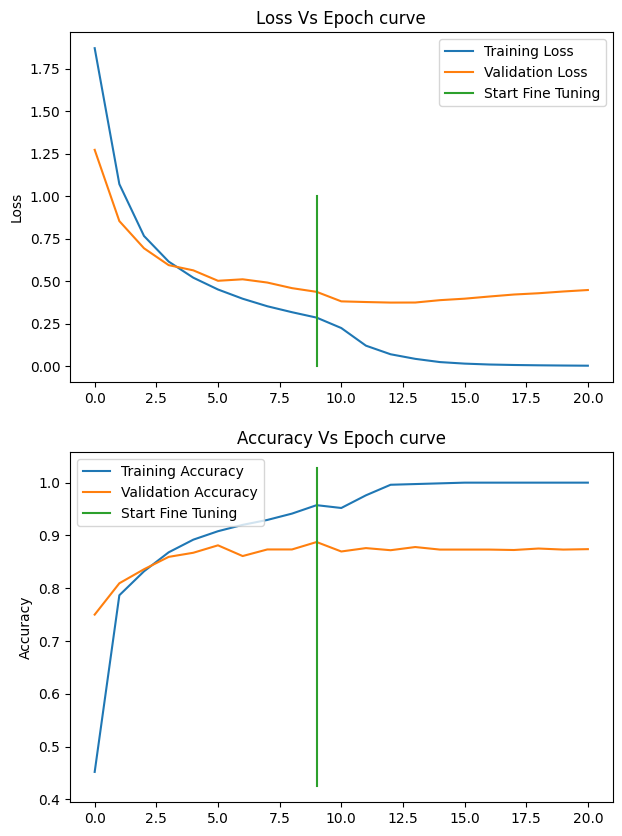

In [ ]:
compare_histories(history_0, history_1)

---

---

## **3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?**

### Make base_model trianable to `True` last 30 layers

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
  layer.trainable = False

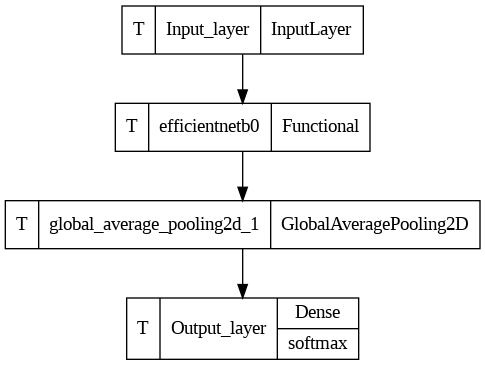

In [ ]:
tf.keras.utils.plot_model(model_0, show_layer_activations=True, show_trainable=True)

### Compile the model

In [ ]:
model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [ ]:
len(model_0.trainable_variables)

30

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 1508970 (5.76 MB)
Non-trainable params: 2553411 (9.74 MB)
_________________________________________________________________


### Load intital weights

In [ ]:
model_0.load_weights('/content/ModelCheckpoint/10_epoch_10_per_data/20240201-180620')

### Fit the model

In [ ]:
history_2 = model_0.fit(train_data,
                        epochs=20,
                        validation_data=test_data,
                        initial_epoch=history_0.epoch[-1],
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='30_trainable_10_per_data')])

Saving the tensorboard callbacks in Tensorboard/30_trainable_10_per_data/20240201-182230
Epoch 10/20
24/24 [==============================] - 19s 361ms/step - loss: 0.8224 - accuracy: 0.7533 - val_loss: 0.6645 - val_accuracy: 0.7896
Epoch 11/20
24/24 [==============================] - 10s 436ms/step - loss: 0.2663 - accuracy: 0.9213 - val_loss: 0.6121 - val_accuracy: 0.8316
Epoch 12/20
24/24 [==============================] - 13s 531ms/step - loss: 0.0618 - accuracy: 0.9800 - val_loss: 0.5940 - val_accuracy: 0.8508
Epoch 13/20
24/24 [==============================] - 7s 293ms/step - loss: 0.0255 - accuracy: 0.9947 - val_loss: 0.7600 - val_accuracy: 0.8248
Epoch 14/20
24/24 [==============================] - 7s 290ms/step - loss: 0.0240 - accuracy: 0.9907 - val_loss: 0.6376 - val_accuracy: 0.8516
Epoch 15/20
24/24 [==============================] - 8s 329ms/step - loss: 0.0143 - accuracy: 0.9960 - val_loss: 0.6775 - val_accuracy: 0.8544
Epoch 16/20
24/24 [==============================]

### Evaluating the model

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.5856 - accuracy: 0.8736


[0.5856208801269531, 0.8736000061035156]

### Comparing the histories

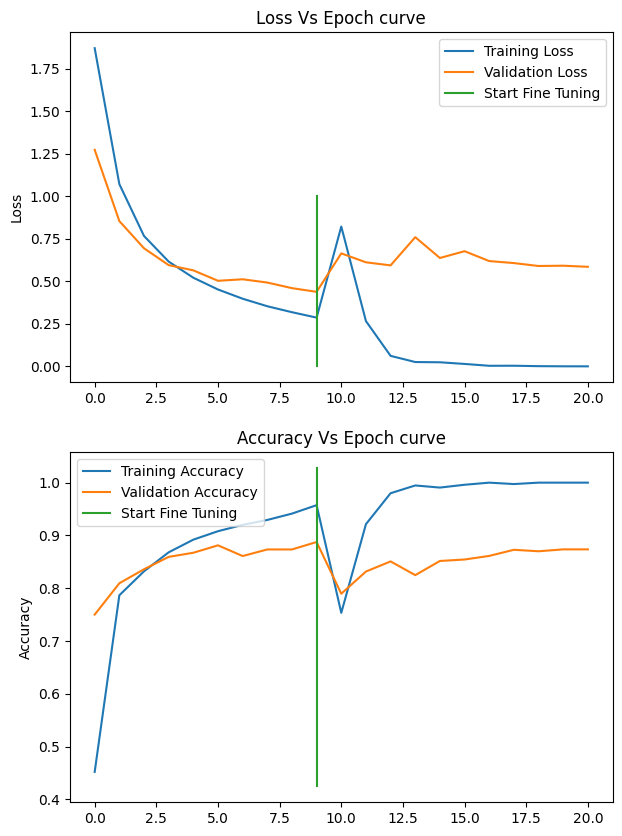

In [ ]:
compare_histories(history_0, history_2)

### Save the model

In [ ]:
model_0.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/EfficientnetB0.keras')

### Load the saved model

In [9]:
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/EfficientnetB0.keras')

In [10]:
saved_model.evaluate(test_data)

79/79 [==============================] - 16s 105ms/step - loss: 0.5856 - accuracy: 0.8736


[0.5856209397315979, 0.8736000061035156]

---

---

---

---

## **1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.mobilenet_v2.MobileNetV2`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.**

### Since there is no scaling layer in Mobilenet_v2, we have to scale manually

In [ ]:
data_rescaling = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1/255.)
])

### Creating Base Model

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                                                            input_shape=IMG_SHAPE)

base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


### Creating the model

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE, name='Input_layer')

x = data_rescaling(inputs)

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name='Output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50

In [ ]:
for i, layer in enumerate(model_0.layers):
  print(i, layer.name, layer.trainable)

0 Input_layer True
1 sequential True
2 mobilenetv2_1.00_224 False
3 global_average_pooling2d True
4 Output_layer True


In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

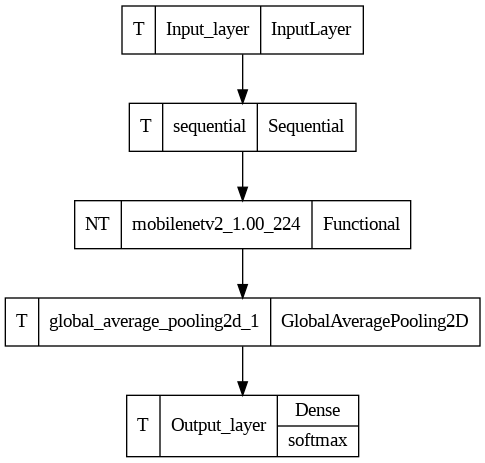

In [ ]:
tf.keras.utils.plot_model(model_0, show_layer_activations=True, show_trainable=True)

### Compiling the model

In [ ]:
model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

### Fit the model

In [ ]:
history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data),
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='10_epoch_10_per_data_mv2'),
                                   tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                              experiment_name='10_epoch_10_per_data_mv2')])

Saving the tensorboard callbacks in Tensorboard/10_epoch_10_per_data_mv2/20240201-174301
Path of the checkpoint: ModelCheckpoint/10_epoch_10_per_data_mv2/20240201-174301
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.8897 - accuracy: 0.3560
Epoch 1: saving model to ModelCheckpoint/10_epoch_10_per_data_mv2/20240201-174301
24/24 [==============================] - 10s 238ms/step - loss: 1.8897 - accuracy: 0.3560 - val_loss: 1.2675 - val_accuracy: 0.6156
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.0445 - accuracy: 0.7079
Epoch 2: saving model to ModelCheckpoint/10_epoch_10_per_data_mv2/20240201-174301
24/24 [==============================] - 5s 169ms/step - loss: 1.0423 - accuracy: 0.7067 - val_loss: 0.9119 - val_accuracy: 0.7344
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7595 - accuracy: 0.7908
Epoch 3: saving model to ModelCheckpoint/10_epoch_10_per_data_mv2/20240201-174301
24/24 [==============================] 

In [ ]:
tensorboard_path = 'Tensorboard/10_epoch_10_per_data_mv2/20240201-174301'
modelcheckpoint_path = 'ModelCheckpoint/10_epoch_10_per_data_mv2/20240201-174301'

### Evaluate the model

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.6576 - accuracy: 0.7772


[0.6576420664787292, 0.7771999835968018]

### Plot loss and accuracy curve

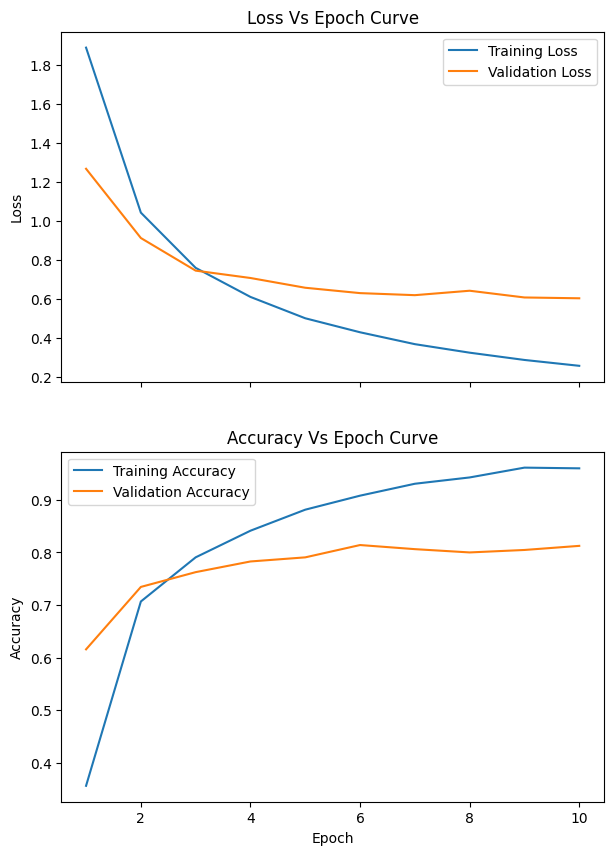

In [ ]:
plot_loss_accuracy_curve(history_0)

---

---

## **2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?**

### Change the base model layers trainable to `True`

In [ ]:
base_model.trainable = True

In [ ]:
print(len(base_model.layers))

154


### Change all base_model all layers trainable to False except last 20 layers

In [ ]:
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

### Checking the model architecture

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 1218890 (

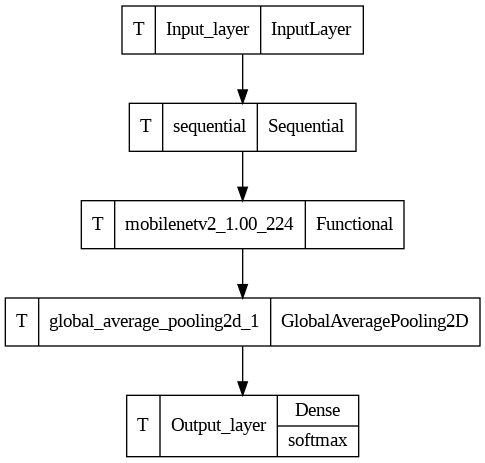

In [ ]:
tf.keras.utils.plot_model(model_0, show_layer_activations=True, show_trainable=True)

### Fit the data updated model

In [ ]:
history_1 = model_0.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data),
                        initial_epoch=history_0.epoch[-1],
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='20_epoch_10_per_data_mv2')])

Saving the tensorboard callbacks in Tensorboard/20_epoch_10_per_data_mv2/20240201-174741
Epoch 10/20
24/24 [==============================] - 4s 162ms/step - loss: 0.2257 - accuracy: 0.9733 - val_loss: 0.5952 - val_accuracy: 0.8109
Epoch 11/20
24/24 [==============================] - 4s 164ms/step - loss: 0.1977 - accuracy: 0.9800 - val_loss: 0.5901 - val_accuracy: 0.8250
Epoch 12/20
24/24 [==============================] - 4s 162ms/step - loss: 0.1783 - accuracy: 0.9867 - val_loss: 0.5943 - val_accuracy: 0.8234
Epoch 13/20
24/24 [==============================] - 3s 122ms/step - loss: 0.1606 - accuracy: 0.9893 - val_loss: 0.6150 - val_accuracy: 0.8109
Epoch 14/20
24/24 [==============================] - 4s 162ms/step - loss: 0.1466 - accuracy: 0.9933 - val_loss: 0.5953 - val_accuracy: 0.8109
Epoch 15/20
24/24 [==============================] - 4s 160ms/step - loss: 0.1341 - accuracy: 0.9960 - val_loss: 0.6009 - val_accuracy: 0.8234
Epoch 16/20
24/24 [==============================] - 

### Evaluate the model

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 5s 54ms/step - loss: 0.6442 - accuracy: 0.7880


[0.6442065238952637, 0.7879999876022339]

### Compare loss and accuracy curve of model-0 and model-1

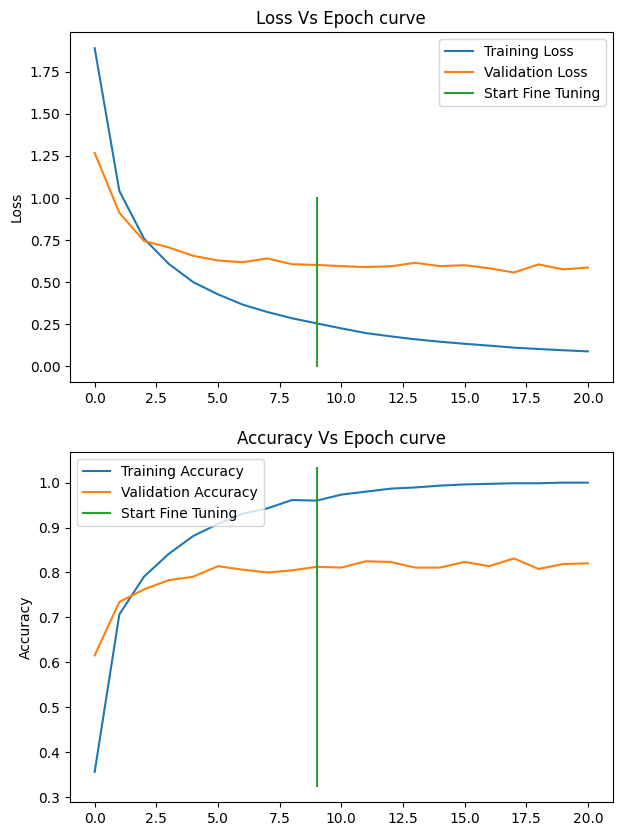

In [ ]:
compare_histories(history_0, history_1)

---

---

## **3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?**

### Make base_model trianable to `True` last 30 layers

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

### Load the initial weights

In [ ]:
model_0.load_weights(modelcheckpoint_path)

### Model architecture

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 1539210 (

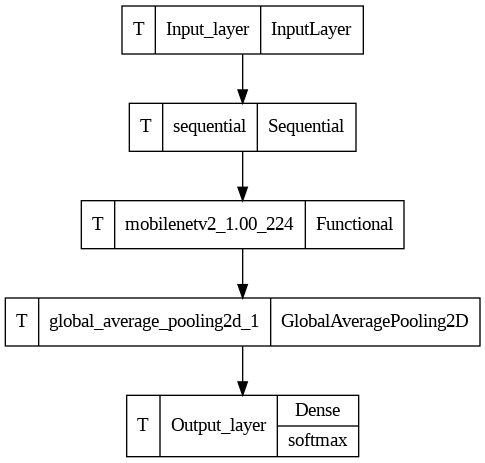

In [ ]:
tf.keras.utils.plot_model(model_0, show_layer_activations=True, show_trainable=True)

### Fit the model

In [ ]:
history_2 = model_0.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data),
                        initial_epoch=history_0.epoch[-1],
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='30_trainable_10_per_data')])

Saving the tensorboard callbacks in Tensorboard/30_trainable_10_per_data/20240201-175258
Epoch 10/20
24/24 [==============================] - 3s 113ms/step - loss: 0.2217 - accuracy: 0.9747 - val_loss: 0.6142 - val_accuracy: 0.8062
Epoch 11/20
24/24 [==============================] - 4s 160ms/step - loss: 0.2000 - accuracy: 0.9853 - val_loss: 0.6162 - val_accuracy: 0.8125
Epoch 12/20
24/24 [==============================] - 4s 140ms/step - loss: 0.1781 - accuracy: 0.9827 - val_loss: 0.5890 - val_accuracy: 0.8109
Epoch 13/20
24/24 [==============================] - 4s 161ms/step - loss: 0.1597 - accuracy: 0.9907 - val_loss: 0.5966 - val_accuracy: 0.8094
Epoch 14/20
24/24 [==============================] - 3s 118ms/step - loss: 0.1453 - accuracy: 0.9933 - val_loss: 0.5644 - val_accuracy: 0.8203
Epoch 15/20
24/24 [==============================] - 4s 165ms/step - loss: 0.1318 - accuracy: 0.9960 - val_loss: 0.6017 - val_accuracy: 0.8125
Epoch 16/20
24/24 [==============================] - 

### Evaluate the model

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 5s 55ms/step - loss: 0.6478 - accuracy: 0.7896


[0.6477903127670288, 0.7896000146865845]

### Compare the loss and accuracy curve

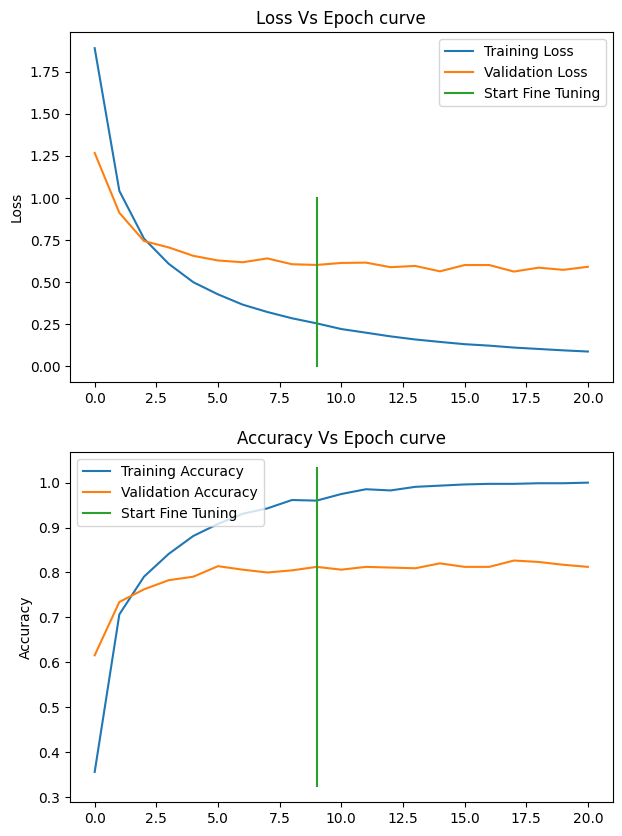

In [ ]:
compare_histories(history_0, history_2)

---

---

## **4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.**

1/1 [==============================] - 0s 26ms/step


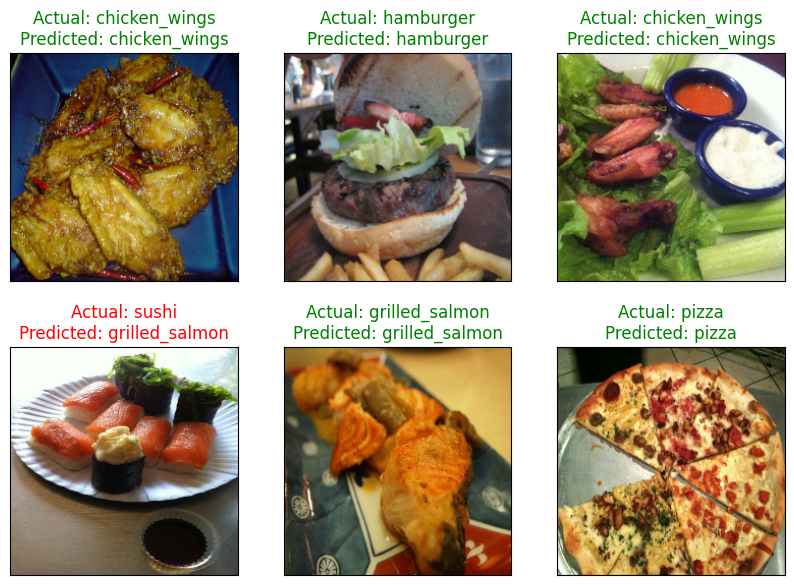

In [15]:
pred_and_plot(saved_model, list(test_data.as_numpy_iterator()), class_names)

---

---


# **📖 05. Transfer Learning in TensorFlow Part 2: Fine-tuning Extra-curriculum**

* Read the [documentation on data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) in TensorFlow.
* Read the [ULMFit paper](https://arxiv.org/abs/1801.06146) (technical) for an introduction to the concept of freezing and unfreezing different layers.
* Read up on learning rate scheduling (there's a [TensorFlow callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler) for this), how could this influence our model training?
  * If you're training for longer, you probably want to reduce the learning rate as you go... the closer you get to the bottom of the hill, the smaller steps you want to take. Imagine it like finding a coin at the bottom of your couch. In the beginning your arm movements are going to be large and the closer you get, the smaller your movements become.
  

---

---